<a href="https://colab.research.google.com/github/angelohafner/linguagem-de-programacao-udesc/blob/main/Petroleum_Engineering_Plots_Workshop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Petroleum Engineering Plotting Workshop (Google Colab)

Short, hands-on notebook to learn plotting with **Matplotlib** and **Plotly** using petroleum engineering examples.

_Generated on 2025-08-20 14:08 UTC_


In [1]:
# Setup: install plotly if needed and import libraries
try:
    import plotly.express as px
    import plotly.graph_objects as go
except Exception as e:
    import sys
    !pip -q install plotly
    import plotly.express as px
    import plotly.graph_objects as go

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (8, 4)

print('Libraries ready.')


Libraries ready.


## 1) Matplotlib basics
Goal: create simple line and scatter plots; set title, labels, grid, and legend.


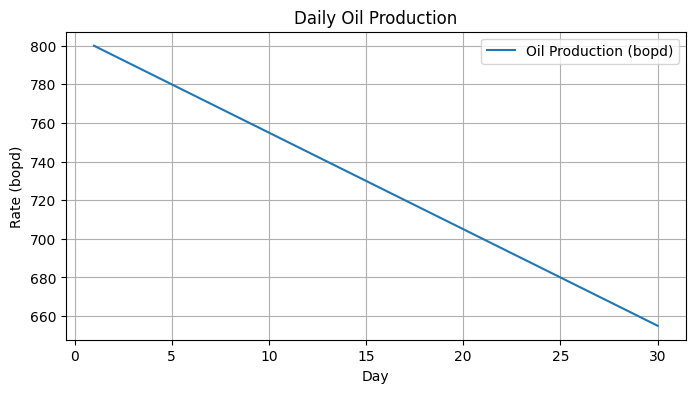

In [2]:
# Example: simple line plot (daily oil production over 30 days)
days = np.arange(1, 31)
prod_bopd = 800 - 5 * (days - 1)  # simple decreasing trend

plt.figure()
plt.plot(days, prod_bopd, label='Oil Production (bopd)')
plt.title('Daily Oil Production')
plt.xlabel('Day')
plt.ylabel('Rate (bopd)')
plt.grid(True)
plt.legend()
plt.show()


**Exercise 1:** Using the arrays `days` and `prod_bopd`, create a scatter plot with markers only (no line). Add a title and axis labels. Add a horizontal dashed line showing the average production.

_Hint:_ Use `plt.scatter`, `np.mean`, and `plt.axhline`.


In [3]:
# TODO: Exercise 1 solution here
avg_prod = np.mean(prod_bopd)
# Your code: scatter, labels, grid, axhline for avg


## 2) Production decline curves (Arps)
We will generate synthetic data for exponential and hyperbolic declines and compare them.


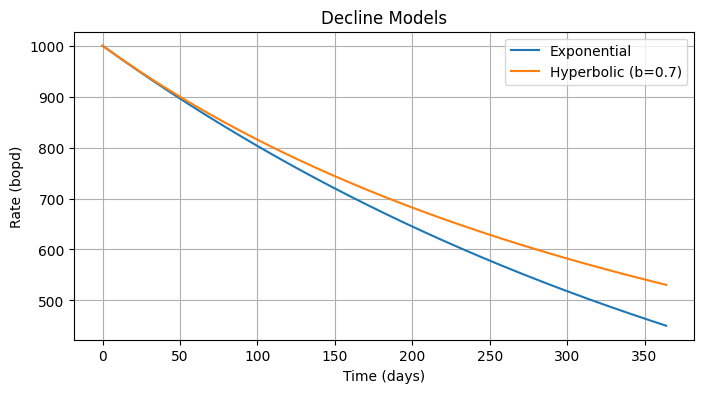

In [4]:
# Synthetic decline data
t_days = np.arange(0, 365)  # one year
qi = 1000.0  # initial rate in bopd
Di = 0.8     # initial nominal decline per year (converted to per day below)
b = 0.7      # hyperbolic exponent

# Convert Di from 1/yr to 1/day for simple discrete generation
Di_day = Di / 365.0

# Exponential: q = qi * exp(-Di_day * t)
q_exp = qi * np.exp(-Di_day * t_days)

# Hyperbolic: q = qi / (1 + b * Di_day * t)^(1/b)
q_hyp = qi / np.power(1.0 + b * Di_day * t_days, 1.0 / b)

plt.figure()
plt.plot(t_days, q_exp, label='Exponential')
plt.plot(t_days, q_hyp, label='Hyperbolic (b=0.7)')
plt.title('Decline Models')
plt.xlabel('Time (days)')
plt.ylabel('Rate (bopd)')
plt.grid(True)
plt.legend()
plt.show()


**Exercise 2:** Compute cumulative production for both decline models using trapezoidal integration and plot `Np` over time for each model.

_Hint:_ Use `np.trapz` with cumulative integration via a loop or by stacking partial integrals._


In [5]:
# TODO: Exercise 2 solution here
# Goal: compute Np_exp(t) and Np_hyp(t) and plot versus t_days


## 3) Reservoir pressure vs. depth (hydrostatic approximation)
Assume a single column with fluid density rho and compute pressure with p = p0 + rho * g * h.


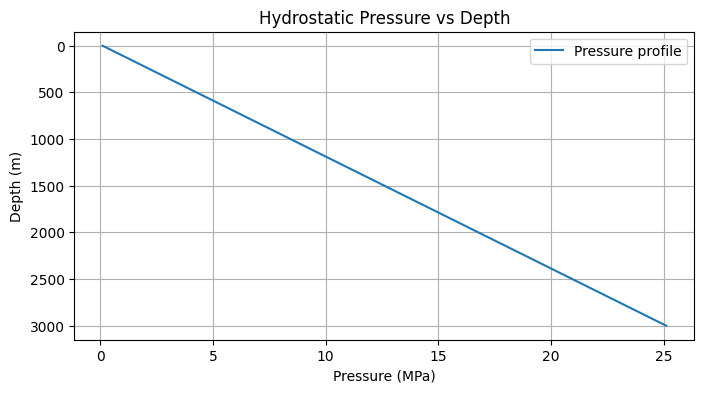

In [6]:
# Pressure vs. depth example
rho = 850.0  # kg/m^3
g = 9.81     # m/s^2
depth = np.linspace(0.0, 3000.0, 200)  # m
p0 = 1.0e5   # Pa at surface
pressure = p0 + rho * g * depth

plt.figure()
plt.plot(pressure / 1e6, depth, label='Pressure profile')
plt.gca().invert_yaxis()
plt.xlabel('Pressure (MPa)')
plt.ylabel('Depth (m)')
plt.title('Hydrostatic Pressure vs Depth')
plt.grid(True)
plt.legend()
plt.show()


**Exercise 3:** Add a gas cap scenario by using a smaller density for the top 500 m, then the oil density below. Plot both curves on the same axes.


In [7]:
# TODO: Exercise 3 solution here
rho_gas = 150.0
# Your code: compute pressure with two densities and plot


## 4) PVT properties (toy data)
We will create synthetic PVT-like relationships and visualize them. Replace with lab data when available.


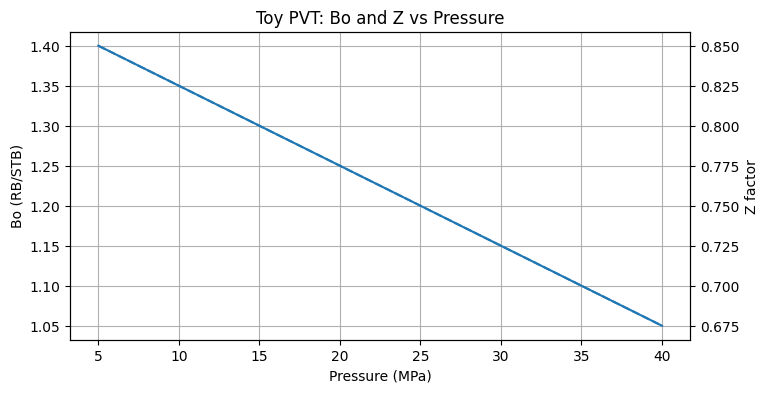

In [8]:
# Synthetic PVT-like data
P = np.linspace(5, 40, 100)  # MPa
Bo = 1.4 - 0.01 * (P - 5)    # Oil formation volume factor (toy)
Bo = np.clip(Bo, 1.05, None)
Z = 0.85 - 0.005 * (P - 5)   # Gas compressibility factor (toy)
Z = np.clip(Z, 0.5, None)

fig, ax1 = plt.subplots()
ax1.plot(P, Bo, label='Bo (oil)')
ax1.set_xlabel('Pressure (MPa)')
ax1.set_ylabel('Bo (RB/STB)')
ax1.grid(True)

ax2 = ax1.twinx()
ax2.plot(P, Z, linestyle='--', label='Z (gas)')
ax2.set_ylabel('Z factor')

plt.title('Toy PVT: Bo and Z vs Pressure')
plt.show()


**Exercise 4:** Using Plotly, create an interactive line chart of Bo vs P with hover data showing (P, Bo). Add a second trace for Z vs P using a secondary y-axis.


In [9]:
# TODO: Exercise 4 solution here (Plotly)
# Hint: use make_subplots(specs=[[{"secondary_y": True}]]) and add_trace


## 5) CSV workflow: read, clean, and plot
This cell writes a small CSV sample. In practice, replace this with your own dataset.


In [10]:
# Create a small CSV with synthetic daily production and water cut
csv_path = 'well_A_timeseries.csv'
np.random.seed(0)
n = 60
d = pd.date_range('2024-01-01', periods=n, freq='D')
rate = 900 - 3 * np.arange(n) + np.random.normal(0.0, 10.0, n)
wc = 0.2 + 0.005 * np.arange(n) + np.random.normal(0.0, 0.01, n)
wc = np.clip(wc, 0.0, 1.0)
df = pd.DataFrame({'date': d, 'oil_rate_bopd': rate, 'water_cut': wc})
df.to_csv(csv_path, index=False)
print('Wrote sample CSV to', csv_path)


Wrote sample CSV to well_A_timeseries.csv


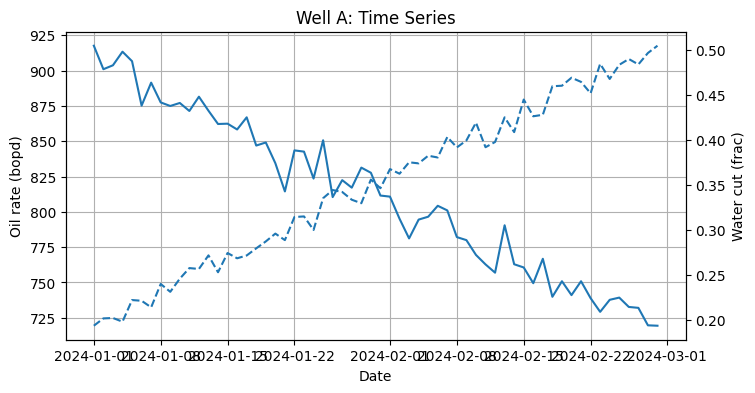

In [11]:
# Read and plot the CSV
df = pd.read_csv('well_A_timeseries.csv', parse_dates=['date'])
df = df.sort_values('date')

fig, ax1 = plt.subplots()
ax1.plot(df['date'], df['oil_rate_bopd'], label='Oil rate (bopd)')
ax1.set_xlabel('Date')
ax1.set_ylabel('Oil rate (bopd)')
ax1.grid(True)

ax2 = ax1.twinx()
ax2.plot(df['date'], df['water_cut'], linestyle='--', label='Water cut')
ax2.set_ylabel('Water cut (frac)')

plt.title('Well A: Time Series')
plt.show()


**Exercise 5:** Compute a 7-day moving average of `oil_rate_bopd` and plot it together with daily values. Then, create a Plotly chart showing water cut vs. date with markers and a rolling median.


In [12]:
# TODO: Exercise 5 solution here
# Hint: use df.rolling(window=7).mean() and for median df.rolling(window=7).median()


## 6) Plot customization mini-lab
Task: Take any of the previous plots and customize: title, axis labels, grid, legend, line styles, and markers. Export the figure as a PNG.


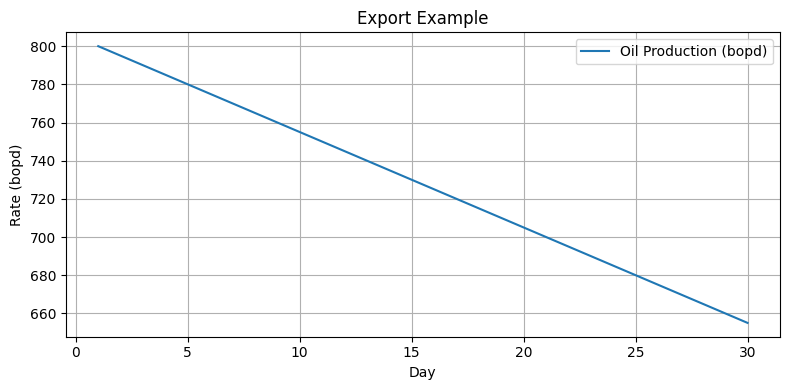

Saved export_example.png with 300 dpi


In [13]:
# Example: export one figure
plt.figure()
plt.plot(days, prod_bopd, label='Oil Production (bopd)')
plt.title('Export Example')
plt.xlabel('Day')
plt.ylabel('Rate (bopd)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.savefig('export_example.png', dpi=300)
plt.show()
print('Saved export_example.png with 300 dpi')


### Next steps
- Replace synthetic data with your field or lab data.
- Consider log scales for pressure and rate when appropriate.
- Build small helper functions for repeated tasks (reading, cleaning, plotting).
